In [ ]:
import gym
import numpy as np
import pickle, os

env = gym.make("Taxi-v3")

state = env.reset()
state

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


211

In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1

import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

def display():
  screen = env.render(mode='rgb_array')
  plt.imshow(screen)
  ipythondisplay.display(plt.gcf())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
n_states = env.observation_space.n
n_states

500

In [ ]:
n_actions = env.action_space.n
n_actions

6

/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


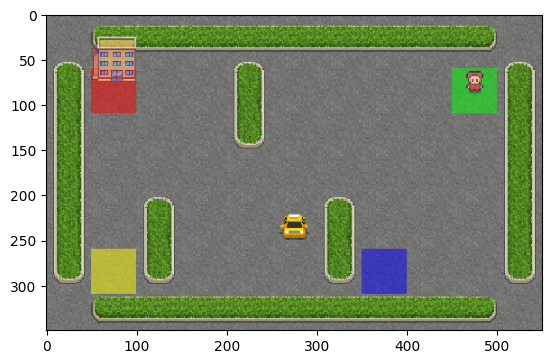

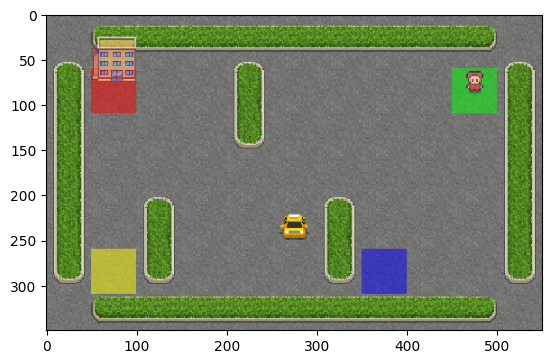

In [ ]:
display()

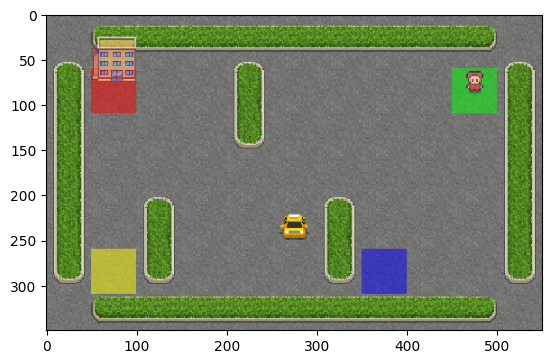

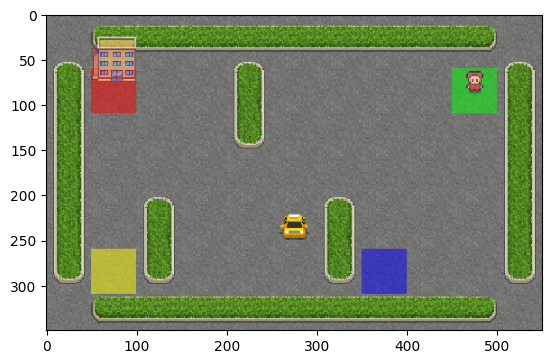

In [ ]:
display()

In [ ]:
from collections import Counter
state = env.reset()
Counter = 0
g = 0

done = False
while not done:
  state, reward, done, info = env.step(env.action_space.sample())
  Counter += 1
  g += reward

print("solved in {} steps with a total reward of {}". format(Counter,g))

solved in 200 steps with a total reward of -776


## Q-Learning

In [ ]:
Q = np.zeros([n_states, n_actions])
episodes = 1
alpha = 0.618

for episodes in range(1, episodes + 1):
  done = False
  reward = 0
  state = env.reset()
  print("Intital State = {}".format(state))
  while done != True:
    action = np.argmax(Q[state])
    state, reward, done, info = env.state(action)
    display()
    total_reward += reward
    counter += 1
  print(f"Completed in {Counter} steps with a total reward of {total_reward}")

Intital State = 28


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: ignored

#SARSA Algorithm

In [ ]:
def learn(state, nextState, reward, action, nextAction):
  predict = Q[state, action]
  target = reward + gamma * Q[nextState, nextAction]
  Q[state, action] += alpha*(target - predict)

In [ ]:
def select_action(state):
  action = 0

  if (np.random.uniform(0, 1) < epsilon):
    action = env.action_space.sample()
  else:
    action = np.argmax(Q[state, :])
  return action

In [ ]:
total_episodes = 1000
max_steps = 100
epsilon = 0.09
alpha = 0.69
gamma = 0.9

Q = np.zeros((env.observation_space.n, env.action_space.n))

## Training Loop

In [ ]:
rewards = 0
for episode in range(total_episodes):
  total_reward = 0
  counter = 0
  state = env.reset()
  action = select_action(state)
  done = False
  while done != True:
    stateNext, reward, done, info = env.step(action)
    actionNext = select_action(stateNext)
    learn(state, stateNext, reward, action, actionNext)
    state = stateNext
    action = actionNext
    total_reward += reward
    counter += 1

  if episode % 10 == 0:
    print(f'Episode {episode} completed in {counter} steps with a total reward: {reward}')
  if episode % 100 == 0:
    with open('Taxi_QTable.pkl', 'wb') as f:
      data = {
          'episode' : episode,
          'Q' : Q
      }
      pickle.dump(data, f)

Episode 0 completed in 35 steps with a total reward: 20
Episode 10 completed in 15 steps with a total reward: 20
Episode 20 completed in 23 steps with a total reward: 20
Episode 30 completed in 200 steps with a total reward: -1
Episode 40 completed in 21 steps with a total reward: 20
Episode 50 completed in 21 steps with a total reward: 20
Episode 60 completed in 18 steps with a total reward: 20
Episode 70 completed in 19 steps with a total reward: 20
Episode 80 completed in 16 steps with a total reward: 20
Episode 90 completed in 73 steps with a total reward: 20
Episode 100 completed in 17 steps with a total reward: 20
Episode 110 completed in 16 steps with a total reward: 20
Episode 120 completed in 20 steps with a total reward: 20
Episode 130 completed in 34 steps with a total reward: 20
Episode 140 completed in 19 steps with a total reward: 20
Episode 150 completed in 14 steps with a total reward: 20
Episode 160 completed in 12 steps with a total reward: 20
Episode 170 completed in

# Bank Loan Problem

In [ ]:
import pandas as pd
dataset = pd.read_csv('sample_data/bankloan.csv')
dataset.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
dataset.tail()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
dataset.shape

(5000, 14)